In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
import pandas as pd
import numpy as np
from fastai import *
from fastai.tabular import *


In [0]:
# multi-purpose function to parse each type of file
def _parse(tng_file, tst_file, val_file):
    tng_dict = {}
    tst_dict = {}
    val_dict = {}
    AA_dict = {}

    # loop through each line of the training file
    for each in tng_file:
        #values = []
        AAs = []
        trick = {}
        # will only be executed once, to create a list of the polymorphic amino acids
        if each.find("No. of output") != -1:
            each = next(tng_file)
            AA = each.strip("# ")
            AA_list = AA.split()
            continue
        # main purpose, identifying the hashtags at the beginning of the significant lines
        if each.find("#") != -1:
            # gathering information on a specific allele
            if (each.find("# input") == -1) & (each.find("# output") == -1):
                temp = each.strip("# ")
                allele = temp.rstrip()
                continue
            # looking for the binary values corresponding to the amino acid polymorphisms
            elif each.find("# input") != -1:
                line = next(tng_file)
                # generating a list of the binary values
                bin_val = line.split()
                bin_val = list(map(int, bin_val))
                # the values for the specific amino acid are zipped into a dictionary with the polymorphic AAs as the keys
                ##AA_dict = dict(zip(AA_list, bin_val))
                ##values.append(AA_dict)
                line = next(tng_file)
                out_lines_idx = line
                specificities_n = out_lines_idx.strip("# output")
                specificities_f = specificities_n.rstrip()
                specificities = specificities_f.split()
                line = next(tng_file)
                out_vals = line.strip(' ').split()
                out_vals = list(map(float,out_vals))
                out_dict = dict(zip(specificities, out_vals))
                for spec in list(out_dict):
                  if out_dict[spec] == 0.00:
                    del(out_dict[spec])
                serology = list(out_dict)
                serology = list(map(str,serology))
                for val in range(len(serology)):
                  serology[val] += 'a'
                #values.append(out_dict)
                spacer = ';'
                serology = spacer.join(serology)
                AAs = ['allele'] + AA_list
                values = [allele] + bin_val
                trick = dict(zip(AAs, values))
                trick['serology'] = serology
                
                tng_dict[allele] = trick

    # basically the same, but to parse the testing file
    for each in tst_file:
        #values = []
        AAs = []
        trick = {}
        if each.find("#") != -1:
            if (each.find("# input") == -1) & (each.find("# output") == -1):
                temp = each.strip("# testing ")
                allele = temp.rstrip()
                continue
            elif each.find("# input") != -1:
                line = next(tst_file)
                bin_val = line.split()
                bin_val = list(map(int,bin_val))
                #AA_dict = dict(zip(AA_list, bin_val))
                #values.append(AA_dict)
                '''
                line = next(tst_file)
                out_lines_idx = line
                specificities_n = out_lines_idx.strip("# output")
                specificities_f = specificities_n.rstrip()
                specificities = specificities_f.split()
                line = next(tst_file)
                out_vals = line.split()
                out_vals = list(map(float,out_vals))
                out_dict = dict(zip(specificities, out_vals))
                for spec in list(out_dict):
                  if out_dict[spec] == 0.00:
                    del(out_dict[spec])
                serology = list(out_dict)
                serology = list(map(str,serology))
                for val in range(len(serology)):
                  serology[val] += 'a'
                #values.append(out_dict)
                '''
                AAs = ['allele'] + AA_list + ['serology']
                values = [allele] + bin_val
                trick = dict(zip(AAs, values))
                trick['serology'] = None
                tst_dict[allele] = trick

     # final loop to parse the validation file       
    for each in val_file:
        #values = []
        AAs = []
        trick = {}
        if each.find("#") != -1:
            if (each.find("# input") == -1) & (each.find("# output") == -1):
                temp = each.strip("# ")
                allele = temp.rstrip()
                continue
            elif each.find("# input") != -1:
                line = next(val_file)
                bin_val = line.split()
                bin_val = list(map(int,bin_val))
                #AA_dict = dict(zip(AA_list, bin_val))
                #values.append(AA_dict)
                line = next(val_file)
                out_lines_idx = line
                specificities_n = out_lines_idx.strip("# output")
                specificities_f = specificities_n.rstrip()
                specificities = specificities_f.split()
                line = next(val_file)
                out_vals = line.strip(' ').split()
                out_vals = list(map(float,out_vals))
                out_dict = dict(zip(specificities, out_vals))
                for spec in list(out_dict):
                  if out_dict[spec] == 0.00:
                    del(out_dict[spec])
                serology = list(out_dict)
                serology = list(map(str,serology))
                for val in range(len(serology)):
                  serology[val] += 'a'
                #values.append(out_dict)
                spacer = ';'
                serology = spacer.join(serology)
                print(serology)
                AAs = ['allele'] + AA_list
                values = [allele] + bin_val
                trick = dict(zip(AAs, values))
                trick['serology'] = serology

                val_dict[allele] = trick
    return(tng_dict, tst_dict, val_dict)

def _file_handler():
    # opening files to send to the parser
    # there is almost definitely a much simpler way to code this

    loci = ["A", "B", "C", "DPB1", "DQB1", "DRB1"]
    output_list = []
    
    for each in loci:
        training_file = open(root_dir + each + ".tng.pat", 'r')
        testing_file = open(root_dir + each + ".tst.pat", 'r')
        validation_file = open(root_dir + each + ".val.pat", 'r')
        tng_dict, tst_dict, val_dict = _parse(training_file, testing_file, validation_file)
        output_list.append(tng_dict)
        output_list.append(tst_dict)
        output_list.append(val_dict)
        training_file.close()
        testing_file.close()
        validation_file.close()

    A = output_list[0:3]
    B = output_list[3:6]
    C = output_list[6:9]
    DPB1 = output_list[9:12]
    DQB1 = output_list[12:15]
    DRB1 = output_list[15:18]

    return(A, B, C, DPB1, DQB1, DRB1)



In [119]:

A, B, C, DPB1, DQB1, DRB1 = _file_handler()

A_tng = A[0]
A_tst = A[1]
A_val = A[2]
tng_alleles = []
tst_alleles = []
val_alleles = []
tng_AAs = []
tst_AAs = []
val_AAs = []
AAs = []
specificities = []

for key in A_tng.keys():
  tng_alleles.append(key)
  tng_AAs.append(A_tng[key])
  for each_dict in tng_AAs:
    for each in each_dict:
      if each_dict[each] == 0:
        each_dict[each] = False
      elif each_dict[each] == 1:
        each_dict[each] = True

for tst_key in A_tst.keys():
  tst_alleles.append(tst_key)
  tst_AAs.append(A_tst[tst_key])
  for each_dict in tst_AAs:
    for each in each_dict:
      if each_dict[each] == 0:
        each_dict[each] = False
      elif each_dict[each] == 1:
        each_dict[each] = True

for val_key in A_val.keys():
  val_alleles.append(val_key)
  val_AAs.append(A_val[val_key])
  for each_dict in val_AAs:
    for each in each_dict:
      if each_dict[each] == 0:
        each_dict[each] = False
      elif each_dict[each] == 1:
        each_dict[each] = True

for each in tng_AAs[0].keys():
  if (each != 'serology') & (each != 'allele'):
    AAs.append(each)


tng_df = pd.DataFrame(data = tng_AAs)
val_df = pd.DataFrame(data = val_AAs)
df = tng_df.append(val_df)
tng_idx = len(tng_df)
val_idx = len(val_df)
tst_df = pd.DataFrame(data = tst_AAs)

dep_var = 'serology'
cat_names = ['allele'] + AAs
procs = [FillMissing, Categorify]


1a
1a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
2a
3a
3a
11a
11a
11a
11a
11a
9a;24a
9a;24a
9a;24a
9a;24a
9a
9a;24a
9a;24a
9a
9a;24a
9a;24a
10a
10a;26a
10a;26a
10a;26a
10a;26a
10a;26a
10a;26a
10a
30a
31a
31a
32a
10a
10a
28a;68a
28a;68a
28a;68a
28a;68a
28a
28a;68a
74a
74a
7a
7a
7a
7a
7a
7a
7a
8a
8a
8a
8a
8a
8a
14a
14a
15a;62a
15a;62a
15a;62a
15a;75a
15a;75a
15a;76a
15a;62a
15a;76a
15a;62a
15a;62a
15a
15a
15a;75a
15a;62a
15a
15a
70a
15a;62a
15a;62a
70a;72a
15a;62a
70a
15a
15a;62a
18a
18a
18a
18a
27a
27a
27a
27a
27a
27a
27a
27a
27a
27a
27a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
35a
16a
16a;38a
16a;39a
16a;39a
16a
16a;39a
16a;39a
16a;39a
16a;39a
16a;39a
16a;39a
16a;39a
16a;39a
16a;39a
40a;61a
40a;61a
40a;60a
40a;61a
40a;60a
40a
40a;61a
21a
40a;61a
40a;61a
40a;60a
40a;60a
41a
12a;44a
12a;44a
12a;44a
12a;44a
12a;44a
12a
12a;44a
12a;44a
12a;44a
12a
47a
46a
47a
48a
48a
48a
48a
21a;50a
5a;51a
5a;51a
5a
5a;52a
5a;51a
5a;51a
5a;51a
22a;54a

In [0]:
cat_names = ['allele'] + AAs
test = TabularList.from_df(tst_df, path=Path(''), cat_names=cat_names)
data = (TabularList.from_df(df=df, path=Path(''), procs=procs, cat_names=cat_names)
                            .split_by_idx(list(range(tng_idx,tng_idx+val_idx)))
                            .label_from_df(cols=dep_var, label_delim=';')
                            .add_test(test)
                            .databunch(bs=37))
                          

In [129]:
data.show_batch(rows = 37)

allele,A1,G1,F9,S9,T9,Y9,M12,V12,R17,S17,S31,T31,Q35,R35,Q43,R43,K44,R44,E56,G56,R56,E62,G62,L62,Q62,R62,E63,N63,Q63,G65,R65,K66,N66,M67,V67,H70,Q70,I73,T73,D74,H74,N74,A76,E76,V76,D77,N77,S77,G79,R79,I80,T80,A81,L81,L82,R82,G83,R83,A90,D90,I95,L95,V95,I97,M97,R97,C99,F99,Y99,D102,H102,P105,S105,G107,W107,F109,L109,E114,H114,Q114,R114,D116,H116,N116,Y116,K127,N127,I142,T142,K144,Q144,H145,R145,A149,T149,A150,V150,H151,R151,A152,E152,R152,V152,W152,L156,Q156,R156,W156,A158,V158,D161,E161,E163,R163,T163,D166,E166,G167,W167,H171,Y171,target
43:01,False,True,False,False,False,True,False,True,True,False,False,True,False,True,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,True,False,True,43a
01:02,False,True,False,True,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,True,False,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,1a
26:03,True,False,False,False,False,True,False,True,True,False,False,True,False,True,True,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,True,False,True,False,True,True,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,True,False,False,True,False,True,False,True,10a;26a
01:03,False,True,True,False,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,True,False,False,True,True,False,False,False,True,False,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,True,False,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,1a
02:06,False,True,False,False,False,True,False,True,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,True,2a
33:03,False,True,Fal

In [130]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

learn = tabular_learner(data, layers=[30,30,30], metrics=[acc_02, f_score])
print(data.classes)

['10a', '11a', '1a', '23a', '24a', '25a', '26a', '28a', '29a', '2a', '30a', '31a', '32a', '33a', '34a', '36a', '3a', '43a', '66a', '68a', '69a', '74a', '80a', '9a']


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 3.63E-02


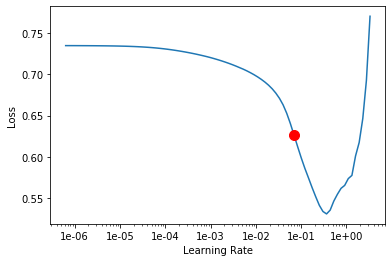

In [131]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [132]:
learn.fit(75, lr=3.63e-2)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.735134,0.674719,0.054435,0.219614,00:00
1,0.711748,0.647611,0.054435,0.219614,00:00
2,0.689995,0.613848,0.054435,0.219614,00:00
3,0.666106,0.573291,0.054435,0.219614,00:00
4,0.639789,0.528848,0.054435,0.219614,00:00
5,0.611471,0.483832,0.088710,0.227416,00:00
6,0.580547,0.435273,0.161290,0.249370,00:00
7,0.547537,0.377729,0.300403,0.296816,00:00
8,0.513460,0.311175,0.532258,0.352291,00:00
9,0.479562,0.250352,0.739247,0.433575,00:00


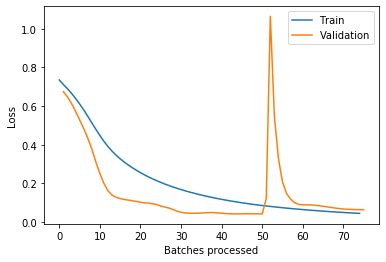

In [133]:
learn.model
learn.recorder.plot_losses()

In [134]:
learn.show_results(rows=10)
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=5)

allele,A1,G1,F9,S9,T9,Y9,M12,V12,R17,S17,S31,T31,Q35,R35,Q43,R43,K44,R44,E56,G56,R56,E62,G62,L62,Q62,R62,E63,N63,Q63,G65,R65,K66,N66,M67,V67,H70,Q70,I73,T73,D74,H74,N74,A76,E76,V76,D77,N77,S77,G79,R79,I80,T80,A81,L81,L82,R82,G83,R83,A90,D90,I95,L95,V95,I97,M97,R97,C99,F99,Y99,D102,H102,P105,S105,G107,W107,F109,L109,E114,H114,Q114,R114,D116,H116,N116,Y116,K127,N127,I142,T142,K144,Q144,H145,R145,A149,T149,A150,V150,H151,R151,A152,E152,R152,V152,W152,L156,Q156,R156,W156,A158,V158,D161,E161,E163,R163,T163,D166,E166,G167,W167,H171,Y171,target,prediction
#na#,False,True,True,False,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,True,False,True,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,True,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,True,False,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,1a,1a
#na#,False,True,True,False,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,True,False,False,True,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,True,1a,1a
#na#,False,True,True,False,False,False,False,True,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,True,2a,2a
#na#,False,True,False,False,False,True,False,True,True,False,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,False,True,2a,2a
#na#,False,True,True,False,False,False,False,True,True,False,False,True,False,True,True,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,True,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,True,False,True,False,True,True,False,True,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,True,2a,2a
#na#

[('10a', '2a', 414),
 ('10a', '9a', 222),
 ('10a', '11a', 161),
 ('10a', '28a', 156),
 ('10a', '1a', 46),
 ('10a', '31a', 46),
 ('10a', '74a', 46),
 ('10a', '29a', 23),
 ('10a', '32a', 23),
 ('10a', '3a', 23),
 ('10a', '69a', 23),
 ('10a', '43a', 22),
 ('11a', '2a', 18),
 ('11a', '9a', 18),
 ('11a', '10a', 14),
 ('11a', '28a', 12)]

In [135]:
predictions = learn.get_preds(DatasetType.Test)[0]
# fast.ai forms heavily recommend using argmax to retrieve predictions. why does this work so well?
labels = np.argmax(predictions, 1)
test_id = tst_df['allele']

classes = data.classes

# found something in the fast.ai forums using very similar code to the line below. why does this work?
ser_labels = [data.classes[i].replace(" ", " ") for i in labels]
print(ser_labels)

# below code involved help from some website using fast.ai to demonstrate kaggle solutions
submission = pd.DataFrame({'allele': test_id, 'serology': ser_labels})
submission.to_csv(root_dir + 'submission.csv', index=False)

['1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '43a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '36a', '1a', '43a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '36a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '1a', '2a', '2a', '2a', '2a', '2a', '2a', '2a', '2a', '2a', '28a', '2a', '2a', '2a', '2a', '2a', '2a', '2a', '28a', '2a', '69a', '29a', '2a', '9a', '2a', '2a', '2a', '29a', '2a', '2a', '2a', '2a', '2a', '28a', '2a', '9a', '2a', '2a', '69a', '9a', '2a', '2a', '2a', '2a'

In [0]:
predictions, *_ = learn.get_preds(DatasetType.Test)
print(_)
labels = np.argmax(predictions, 1)

test_id = tst_df['allele']

submission = pd.DataFrame({'allele': test_id, 'serology': labels})
submission.to_csv(root_dir + 'submission.csv', index=False)

In [0]:

learn.pred_batch()